# 事前準備：共通コードの実行
* このノートブックに接続したら，まずは以下の2つの共通コード（コードAとコードB）を実行する
* これらの共通コードを実行しないと，それ以降のコードが実行できないので注意する
* また，コードAとコードBは，ノートブックに接続するたび毎回実行すること（ノートブックに接続中は，何度も実行する必要はない）
* 共通コードの詳細についての説明は割愛する（簡単な説明は第2回の「[サンプルノートブック02](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook02.ipynb)」を参照）

In [ ]:
# コードA：日本語化ライブラリ導入
! pip install japanize-matplotlib | tail -n 1

In [1]:
# コードB：共通事前処理

# B1:余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # matplotlib日本語化対応
import seaborn as sns

# B2:データフレーム表示用関数
from IPython.display import display

# B3:表示オプション調整
np.set_printoptions(suppress = True, precision = 3) #numpyの浮動小数点の表示精度
pd.options.display.float_format = '{:.3f}'.format #pandasでの浮動小数点の表示精度
pd.set_option('display.max_columns', None) #データフレームですべての列データを表示

# B4:グラフのデフォルトフォント指定
plt.rcParams['font.size'] = 14

# 乱数の種
random_seed = 0

# 機械学習によるデータ分析の簡単な例
ここでは，簡単な例を用いて，機械学習によるデータ分析プロセスの流れを把握していく．

## データの読み込みと確認
* 例として，以下のURLにあるcsvファイルを用いる
>* https://bit.ly/41AJL2v
* このデータは，機械学習によるデータ分析体験用の人工データで，以降は「派閥データ」と呼ぶ
* 派閥データは，身長，体重，年代，派閥（きのこ or たけのこ）からなる19個（19人分のデータ）のデータ
* ここでは，身長，体重，年代を特徴量とし，派閥を目的変数とする ⇒ 特徴量によって派閥を予測する
* よって，ここでの予測は分類による予測となる
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_kvst`に代入
*  3行目: `display`関数を使ってデータ（`df_kvst`の内容）を表示

In [2]:
url = 'https://bit.ly/41AJL2v'
df_kvst = pd.read_csv(url)
display(df_kvst)

,身長,体重,年代,派閥
0,170,60,10,きのこ
1,172,65,20,きのこ
2,170,60,30,たけのこ
3,170,65,40,きのこ
4,177,65,10,たけのこ
5,168,55,20,きのこ
6,169,65,30,たけのこ
7,170,62,40,たけのこ
8,180,70,10,たけのこ
9,170,68,20,きのこ


## データの前処理
* ここでは教師あり学習を行うので，列データを特徴量と正解データ（教師データ）に分割する
>*   特徴量: 身長，体重，年代
>*   正解データ: 派閥
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_kvst`に代入
*  3行目: DataFrame `df_kvst` から,`df_kvst[['身長', '体重', '年代']]`で特徴量の列「身長」「体重」「年代」だけ取り出し変数`x`に代入
*  4行目: DataFrame `df_kvst` から,`df_kvst['派閥']`で正解データの列「派閥」だけ取り出し変数`t`に代入
>*  変数`t`のクラスは Series になる
*  *  7行目: `print`関数で区切り線「================ x ================」を表示
*  6行目: `display`関数で変数`x`（特徴量）を表示
*  7行目: `print`関数で区切り線「================ t ================」を表示
*  9行目: `display`関数で変数`t`（正解データ）を表示
>*  `pd.DataFrame(t)`で，Seriesの変数tをDataFrameに変換する

In [4]:
url = 'https://bit.ly/41AJL2v'
df_kvst = pd.read_csv(url)
x = df_kvst[['身長', '体重', '年代']]
t = df_kvst['派閥']
print('================ x ================')
display(x)
print('================ t ================')
display(pd.DataFrame(t))

================ x ================


,身長,体重,年代
0,170,60,10
1,172,65,20
2,170,60,30
3,170,65,40
4,177,65,10
5,168,55,20
6,169,65,30
7,170,62,40
8,180,70,10
9,170,68,20


================ t ================


,派閥
0,きのこ
1,きのこ
2,たけのこ
3,きのこ
4,たけのこ
5,きのこ
6,たけのこ
7,たけのこ
8,たけのこ
9,きのこ


# Pythonによる機械学習の実践
* 本講義では，scikit-learn（サイキットラーン）というライブラリを用いる
* scikit-learnとは，Pythonで使用できる機械学習ライブラリ（複数のモジュールの集まり）の一つ
* scikit-learnを利用することで様々な機械学習を行うことが可能
* Pythonでscikit-learnを利用する場合には「`sklearn`」と記述する
* `sklearn`には機械学習のタイプに応じて様々なモジュールが用意されている
* 各モジュールの中には，機械学習を行うためのクラスが複数用意されている
* これらのクラスからオブジェクトを生成することで，機械学習が実践できる

## オブジェクトとメソッド
* Pythonではすべての値がオブジェクト
* オブジェクトはあるクラスに属している
* 変数はオブジェクトの入れ物（オブジェクトに名前を付けている）
* クラスには固有のメソッドが定義されている
* メソッドは，そのクラスに属するすべてのオブジェクトが使える
* メソッド＝オブジェクトに対する何らかの処理



## オブジェクトと属性
* クラスにはメソッドの他にも，固有の属性が定義されている
* メソッドは関数のような処理と解釈できるが，属性は変数のような値の入れ物（あるいは値自体）と解釈できる
* イメージ例: 「人間」クラスのオブジェクト
>* 「歩く」「話す」などがメソッドに対応
>* 「名前」「年齢」「職業」などが属性に対応
* 同じクラスでも異なるオブジェクトであれば異なる属性の値を持つこともある
* 属性の値は変更されることもある


## 分類木モデル
* ここでは基本的な教師あり学習の一つである分類木モデルを利用する（分類木モデルの詳細は後述）
* 教科書では「決定木」と呼んでいるが，正確には「分類を目的とした決定木」なので，本講義では「分類木」と呼ぶ
* scikit-learnの`tree`モジュールを読み込むことで分類木モデルが利用できる
* `tree`モジュールには「木」で表現できる様々なモデルを扱うためのクラスが複数用意されている
* モデルの学習をするためには，対応するクラスのオブジェクトをまずは生成する必要がある
* 分類木モデルの場合は，`tree`モジュールにおける`DecisionTreeClassifier`クラスのオブジェクトを生成する
>* [DecisionTreeClassifierクラスの公式ドキュメント](https://scikit-learn.org/1.6/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* オブジェクト生成の書式: `モジュール名.クラス名(引数)`
* 一般に生成したオブジェクトを変数に代入して利用する

## 分類木モデルの学習準備
* `sklearn`の`tree`モジュールを読み込む ⇒ `from sklearn import tree`
* オブジェクトを生成する ⇒ `tree.DecisionTreeClassifier(random_state = random_seed)`
>* 引数の`random_state`は，学習に乱数を用いる場合に指定できる引数
>* `random_state`で乱数の種（シード）を指定する
>* 乱数には無数のパターンが用意されており，それらパターンの番号のことを乱数の種と呼ぶ
>* 少々乱暴な説明ではあるが，本講義においてはこの解釈で十分
>* 乱数の種を指定することで常に同じ結果が得られる
* 生成したオブジェクトは変数に代入して取り扱う

## 分類木モデルの学習
* オブジェクトを生成したら，分類木モデルの学習を実行する
* 分類木モデルの学習は，`fit`メソッドを利用して実行する
* 他の多くのモデルの学習でも`fit`メソッドを用いる
* `fit`メソッドの引数には，特徴量と正解データを指定する
* モデルの学習の書式: `変数名.fit(X=x, y=t)`
>* 変数名はオブジェクトを代入した変数の名前
>* 「`X=`」で特徴量，「`y=`」で目的変数を指定する
* 学習済みモデルの情報は，`fit`メソッドを適用後のオブジェクトの属性から参照できる
* 同様にモデルの評価のために必要な情報も属性から参照できる
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_kvst`に代入
*  3行目: DataFrame `df_kvst` から,`df_kvst[['身長', '体重', '年代']]`で特徴量の列「身長」「体重」「年代」だけ取り出し変数`x`に代入
*  4行目: DataFrame `df_kvst` から,`df_kvst['派閥']`で正解データの列「派閥」だけ取り出し変数`t`に代入
>*  変数`t`のクラスは Series になる
*  5行目: `sklearn` (scikit-learn) の`tree`モジュールを読み込む 
*  6行目: `tree.DecisionTreeClassifier(random_state = random_seed)`で，分類木モデルの学習を行うためのオブジェクトを`tree`モジュールの`DecisionTreeClassifier`クラスから生成し，変数`model_kvst`に代入
>* `random_state`で乱数の種（シード）を指定する
>*  ここでは，共通コードで定義した変数`random_seed`に格納されている値を乱数の種として用いる
*  7行目: `fit`メソッドで分類木モデルの学習を実行

In [21]:
url = 'https://bit.ly/41AJL2v'
df_kvst = pd.read_csv(url)
x = df_kvst[['身長', '体重', '年代']]
t = df_kvst['派閥']
from sklearn import tree
model_kvst = tree.DecisionTreeClassifier(random_state = random_seed)
model_kvst.fit(X = x, y = t)

DecisionTreeClassifier(random_state=123)

## 学習済みモデルを使った予測
* 正解データが未知の特徴量から正解データを推測することを予測と呼ぶ
>* 今回の例は分類に対する予測
* 学習済みモデルが得られると，それを使って予測ができる
* 予測は`predict`メソッドを用いる
>* 書式: `変数名.predict(X = 特徴量)`
>* 「`X =`」で特徴量を表すDataFrameやリストを指定
>* 戻り値は予測結果（この例の場合は派閥）
>* 予測結果のデータ型はNumPyの配列（ndarray）
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_kvst`に代入
*  3行目: DataFrame `df_kvst` から,`df_kvst[['身長', '体重', '年代']]`で特徴量の列「身長」「体重」「年代」だけ取り出し変数`x`に代入
*  4行目: DataFrame `df_kvst` から,`df_kvst['派閥']`で正解データの列「派閥」だけ取り出し変数`t`に代入
>*  変数`t`のクラスは Series になる
*  5行目: `sklearn` (scikit-learn) の`tree`モジュールを読み込む 
*  6行目: `tree.DecisionTreeClassifier(random_state = random_seed)`で，分類木モデルの学習を行うためのオブジェクトを`tree`モジュールの`DecisionTreeClassifier`クラスから生成し，変数`model_kvst`に代入
>* `random_state`で乱数の種（シード）を指定する
>*  ここでは，共通コードで定義した変数`random_seed`に格納されている値を乱数の種として用いる
*  7行目: `fit`メソッドで分類木モデルの学習を実行
*  8行目: 新しい3人分の特徴量（リスト`[身長, 体重, 年代]`）のリスト`[[170, 70, 20], [160, 50, 10], [165, 75, 30]]`を変数`newdata`に代入
*  9行目: `predict`メソッドを用いて，特徴量`newdata`に対する予測を行い，その結果（`predict`メソッドの戻り値）を`print`関数で表示
>*  `f'予測結果： {model_kvst.predict(X = newdata)}'` は f-string

In [5]:
url = 'https://bit.ly/41AJL2v'
df_kvst = pd.read_csv(url)
x = df_kvst[['身長', '体重', '年代']]
t = df_kvst['派閥']
from sklearn import tree
model_kvst = tree.DecisionTreeClassifier(random_state = random_seed)
model_kvst.fit(X = x, y = t)
newdata = [[170, 70, 20], [160, 50, 10], [165, 75, 30]]
print(f'予測結果： {model_kvst.predict(X = newdata)}')

予測結果： ['きのこ' 'たけのこ' 'たけのこ']


## 分類木モデルの描画
* 分類木モデルは木構造で視覚的に表現できる
* 分類木モデルの描画は`tree`モジュールの`plot_tree`関数を使う
* このとき，`matplotlib`の`pyplot`モジュールも読み込む必要がある
* `plot_tree`関数の書式: `tree.plot_tree(decision_tree = オブジェクト, feature_names = 特徴量名)`
>* 「`decision_tree =`」で学習済みモデルの情報を持つオブジェクト名を指定
>* 「`feature_names =`」で図中に表示する特徴量の名前のリストを指定
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_kvst`に代入
*  3行目: DataFrame `df_kvst` から,`df_kvst[['身長', '体重', '年代']]`で特徴量の列「身長」「体重」「年代」だけ取り出し変数`x`に代入
*  4行目: DataFrame `df_kvst` から,`df_kvst['派閥']`で正解データの列「派閥」だけ取り出し変数`t`に代入
>*  変数`t`のクラスは Series になる
*  5行目: `sklearn` (scikit-learn) の`tree`モジュールを読み込む 
*  6行目: `tree.DecisionTreeClassifier(random_state = random_seed)`で，分類木モデルの学習を行うためのオブジェクトを`tree`モジュールの`DecisionTreeClassifier`クラスから生成し，変数`model_kvst`に代入
>* `random_state`で乱数の種（シード）を指定する
>*  ここでは，共通コードで定義した変数`random_seed`に格納されている値を乱数の種として用いる
*  7行目: `fit`メソッドで分類木モデルの学習を実行
*  8行目: `pyplot`モジュールの`figure`関数を使って，図のサイズ（高さと幅）を指定
>* 引数「`figsize = (幅, 高さ)`」でサイズを指定
>* 単位は「インチ（inch）」 
*  9行目: `plot_tree`関数で分類木を描画
>* 引数「`decision_tree = model_kvst`」で描画する分類木モデルを指定
>* 引数「`feature_names = list(x.columns)`」で図中に表示する特徴量名を指定（DataFrame `x`の列名）
>* `x.columns`は，`x`の属性で，DataFrame `x`の列名を値として持つ「Index型」と呼ばれるデータ
>* `feature_names`はリスト（list）で指定する必要があるので，`list(x.columns)`としてリストに変換している
*  10行目: `show`関数で，それまでに設定した図（分類木モデル）を実行画面に表示


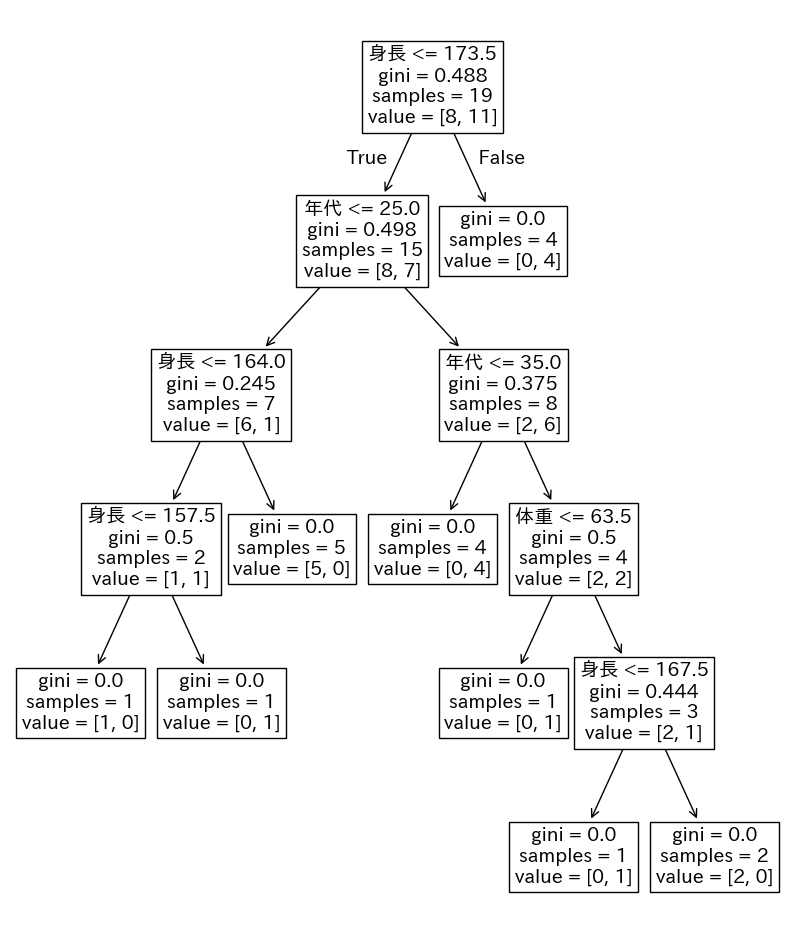

In [6]:
url = 'https://bit.ly/41AJL2v'
df_kvst = pd.read_csv(url)
x = df_kvst[['身長', '体重', '年代']]
t = df_kvst['派閥']
from sklearn import tree
model_kvst = tree.DecisionTreeClassifier(random_state = random_seed)
model_kvst.fit(X = x, y = t)
plt.figure(figsize = (10, 12))
tree.plot_tree(decision_tree = model_kvst, feature_names = list(x.columns))
plt.show()

## 描画した分類木の見方
* 最上部のノードから出発して，各ノードの分岐条件によって左下または右下のノードへ進んでいく
* 条件を満たしているデータは左下のノードへ，そうでなければ右下のノードへ進む
* 葉ノードに達したらvalueの値が最大のものを予測値とする

## モデルの評価
* 学習したモデルが必ず正しい予測結果を返すとは限らない
* 選択したモデルや利用したデータが不適切だった場合には，誤った学習をしてしまって，予測結果と実際の値に大きなずれが生じる
* そのため，モデルの予測性能を評価する必要がある
* モデルによって具体的な評価指標は異なる
* **精度**（Accuracy）は，教師あり学習における代表的なモデル評価指標の一つ
* 精度は正解率とも呼ばれるが，機械学習の文脈では「精度（Accuracy）」のほうが一般的
* ［精度］＝［実際の値（正解データ）と予測結果が一致しているデータ数］÷［総データ数］
* 精度は`DecisionTreeClassifier`クラスの`score`メソッドで計算できる
* 書式: `変数名.score(X = 特徴量データ, y = 正解データ)`
>* 「`X=`」で特徴量データ，「`y=`」で正解データ（目的変数）を指定する
>* 学習に利用していない別のデータを使ってもよい（後述）
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_kvst`に代入
*  3行目: DataFrame `df_kvst` から,`df_kvst[['身長', '体重', '年代']]`で特徴量の列「身長」「体重」「年代」だけ取り出し変数`x`に代入
*  4行目: DataFrame `df_kvst` から,`df_kvst['派閥']`で正解データの列「派閥」だけ取り出し変数`t`に代入
>*  変数`t`のクラスは Series になる
*  5行目: `sklearn` (scikit-learn) の`tree`モジュールを読み込む 
*  6行目: `tree.DecisionTreeClassifier`で，分類木モデルの学習を行うためのオブジェクトを`tree`モジュールの`DecisionTreeClassifier`クラスから生成し，変数`model_kvst`に代入
>* `random_state`で乱数の種（シード）を指定する
>*  ここでは，共通コードで定義した変数`random_seed`に格納されている値を乱数の種として用いる
*  7行目: `fit`メソッドで分類木モデルの学習を実行
*  8行目: `model_kvst.score(X = x, y = t)`で精度（Accuracy）を計算し，`print`関数でその結果を表示
>* `f'精度（Accuracy）: {model_kvst.score(X = x, y = t)}'`は，f-string

In [15]:
url = 'https://bit.ly/41AJL2v'
df_kvst = pd.read_csv(url)
x = df_kvst[['身長', '体重', '年代']]
t = df_kvst['派閥']
from sklearn import tree
model_kvst = tree.DecisionTreeClassifier(random_state = random_seed)
model_kvst.fit(X = x, y = t)
print(f'精度（Accuracy）: {model_kvst.score(X = x, y = t)}')

精度（Accuracy）: 1.0


# 分類木モデルの学習

## データの読み込みと確認
* 例として，以下のURLにあるcsvファイルを用いる
>* https://bit.ly/43mPz0L
>* 出典: 須藤秋良, 株式会社フレアリンク: スッキリわかるPythonによる機械学習入門, インプレス, 2020
* このデータは，1936年にRonald A. Fisherが発表した判別分析に関する論文で用いられているデータ（以降，アヤメデータと呼ぶ）がもとになっている
>* オリジナルのデータのURL: https://archive.ics.uci.edu/ml/datasets/iris
* 今回使用するデータは，このオリジナルのデータを加工したもの
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`iris`に代入
*  3行目: `display`関数を使ってデータ（`iris`の内容）を表示


In [ ]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
display(iris)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.220,0.630,0.080,0.040,setosa
1,0.170,0.420,0.350,0.040,setosa
2,0.110,0.500,0.130,0.040,setosa
3,0.080,0.460,0.260,0.040,setosa
4,0.190,0.670,0.440,0.040,setosa
...,...,...,...,...,...
145,0.670,0.420,0.540,0.920,virginica
146,0.560,0.210,0.690,0.460,virginica
147,0.610,0.420,NaN,0.790,virginica
148,0.530,0.580,0.630,0.920,virginica


## アヤメの種類の確認
* ここでは，がく片長さ，がく片幅，花弁長さ，花弁幅を特徴量，種類を目的変数（正解データ）として，特徴量から花の種類を分類することを考えていく 
* まずは，目的変数が何種類で何個ずつあるか，以下のコードで確認する
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`iris`に代入
*  3行目: 列「種類」の値の頻度を抽出し，その結果を`display`関数で表示
>* `iris['種類'].value_counts()`で，DataFrameである`iris`の列「種類」にどんな値がそれぞれ何個あるのかを調べる
>* 一般的な書式: `df['列名'].value_counts()`
>* `df`は任意のDataFrame
>* `value_counts`メソッドの戻り値は Series
>* 各値がSeriesのindexで，そのデータ数がSeriesの値となる
>* このSeriesのデータを，pandasの`DataFrame`関数でDataFrameに変換 ⇒ `pd.DataFrame(iris['種類'].value_counts())`
>* 変換したDataFrameを`display`関数で表示

In [7]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url) 
display(pd.DataFrame(iris['種類'].value_counts()))

,count
種類,
setosa,50
versicolor,50
virginica,50


* 上記コードによって，花の種類（目的変数）は，以下の3種であることが確認できた．
>*   setosa（セトサ／ヒオウギアヤメ）
>*   versicolor（バージカラー／ブルーフラッグ）
>*   virginica（バージニカ／バージニアアイリス）  
*  また，各種のデータが50個ずつあることも確認できた．

## 特徴量の各種統計量
* 次に，4つの特徴量（がく片長さ～花弁幅）の各種統計量を`describe`メソッドで求める
* 「種類」の列は数値ではないので，除外される

**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`iris`に代入
*  3行目: `describe`メソッドで，4つの特徴量（がく片長さ～花弁幅）の各種統計量を計算し，その結果を`display`関数で表示

In [22]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
display(iris.describe())

,がく片長さ,がく片幅,花弁長さ,花弁幅
count,148.000,149.000,148.000,148.000
mean,0.421,0.440,0.487,0.447
std,0.229,0.181,0.232,0.310
min,0.000,0.000,0.010,0.010
25%,0.220,0.330,0.320,0.080
50%,0.405,0.420,0.490,0.500
75%,0.580,0.540,0.660,0.710
max,0.940,1.000,0.950,0.960


## データの前処理

### 欠損値の確認
* データの前処理として，アヤメデータに欠損値がないかを確認する
* 欠損値の確認には，`isnull`メソッドを使う
* `isnull`メソッドを使うと，DataFrame内の欠損値（NaN: Not a Number）がある場所は「`True`」，そうでない場所は「`False`」となるDataFrameが作成できる
* 詳細は「[ノートブック：SeriesとDataFrameの基本操作](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook_se_df.ipynb)」を参照
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`iris`に代入
*  3行目: `isnull`メソッドで`iris`の中に欠損値があるか確認し，その結果を`display`関数で表示
* 結果からインデックス「147」の「花弁長さ」に欠損があるとわかる（すべてのデータが見えてないことに注意）

In [30]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
display(iris.isnull())

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,True,False,False
148,False,False,False,False,False


* 次に，DataFrame全体で，どの列に欠損値があるかを`any`メソッドで確認する
* `any`メソッドを使うと，各列（or 各行）において，1つ以上「`True`」があるかを確認できる
>* 列（or 行）内に一つでも「`True`」があれば「`True`」を返す
* 引数`axis`で行方向（`= 0`）に見るか，列方向（`= 1`）に見るかを決める
>* 行方向は各列に対して上から下に見る
>* 列方向は各行に対して左から右に見る
* 戻り値は Series
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`iris`に代入
*  3行目: `isnull`メソッドと`any`メソッドで，`iris`の中で欠損値がある列を確認し，その結果を`display`関数で表示
>* `iris.isnull()`で，`iris`内の欠損値を`True`，それ以外を`False`とした DataFrame に変換する（戻り値が DataFrame）
>* `iris.isnull()`の戻り値に対して，`any`メソッドを使って`iris.isnull().any(axis = 0)`とし，`True`（欠損値）がある列を`True`，ない列を`Flase`とした Series に変換する（戻り値が Series）
>* それを`DataFrame`関数でDataFrameに変換し，`display`関数で表示
>* `DataFrame`関数の引数`columns = ['欠損値']`で列名を「欠損値」と指定
*  実行結果から4つの特徴量に欠損値があることが確認できる

In [33]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
display(pd.DataFrame(iris.isnull().any(axis = 0), columns = ['欠損値']))

,欠損値
がく片長さ,True
がく片幅,True
花弁長さ,True
花弁幅,True
種類,False


### 欠損値への対処

#### 欠損値のある行データを削除
* `dropna`メソッドを使って，欠損値がある行を削除し，欠損値がないデータにする
* 書式: `df.dropna(how = 'any' or 'all', axis = 0 or 1)`
* `dropna`メソッドは，欠損値のあるデータを削除したDataFrameを戻り値として返す
* 引数`how`と`axis`については以下のとおり
>*  `how`: 「`'any'`」とすると欠損値が一つでもあれば削除，「`'all'`」とすると全てが欠損値であれば削除
>*  `axis`: 「1」とすると欠損値のある列を削除，「0」とすると行を削除
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`iris`に代入
*  3行目: `iris.dropna(how = 'any', axis = 0)`で，`iris`に対して一つ以上の欠損値がある行を削除し，変数`iris_drop`に代入
*  4行目: `display`関数で，`iris_drop`の内容を表示
*  削除した結果，150行から143行になる

In [8]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
iris_drop = iris.dropna(how = 'any', axis = 0)
display(iris_drop)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.220,0.630,0.080,0.040,setosa
1,0.170,0.420,0.350,0.040,setosa
2,0.110,0.500,0.130,0.040,setosa
3,0.080,0.460,0.260,0.040,setosa
4,0.190,0.670,0.440,0.040,setosa
...,...,...,...,...,...
144,0.670,0.540,0.700,0.720,virginica
145,0.670,0.420,0.540,0.920,virginica
146,0.560,0.210,0.690,0.460,virginica
148,0.530,0.580,0.630,0.920,virginica


*  念のため，`iris_drop`に欠損値がないかを次のコードで確認する
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`iris`に代入
*  3行目: `iris.dropna(how = 'any', axis = 0)`で，`iris`に対して一つ以上の欠損値がある行を削除し，変数`iris_drop`に代入
*  4行目: `isnull`メソッドと`any`メソッドで，`iris_drop`の中で欠損値がある列を確認し，その結果を`display`関数で表示
>* `iris.isnull()`で，`iris_drop`内の欠損値を`True`，それ以外を`False`とした DataFrame に変換する（戻り値が DataFrame）
>* `iris.isnull()`の戻り値に対して，`any`メソッドを使って`iris_drop.isnull().any(axis = 0)`とし，`True`（欠損値）がある列を`True`，ない列を`Flase`とした Series に変換する（戻り値が Series）
>* それを`DataFrame`関数でDataFrameに変換し，`display`関数で表示
>* `DataFrame`関数の引数`columns = ['欠損値']`で列名を「欠損値」と指定

In [35]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
iris_drop = iris.dropna(how = 'any', axis = 0)
display(pd.DataFrame(iris_drop.isnull().any(axis = 0), columns = ['欠損値']))

,欠損値
がく片長さ,False
がく片幅,False
花弁長さ,False
花弁幅,False
種類,False


#### 欠損値を算術平均に置き換える
* 欠損値のあるデータを削除するのではなく，該当する特徴量の代表値（算術平均や中央値）に置き換えて対処することもある（こちらのほうが一般的）
* ここでは，算術平均を使って穴埋めする
* 欠損値を別の値に置き換えるには，`fillna`メソッドを使う
* 書式: `df.fillna(置き換える値)`
* 列ごとに置き換える値を変える場合は，Seriesやディクショナリ（dict）を引数として指定する（以下のコードではSeriesを引数としている）
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`iris`に代入
*  3行目: `fillna`メソッドを使って，`iris.fillna(iris[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`iris_comp`に代入
>* `fillna`メソッドの引数は，各特徴量の算術平均
>* 各特徴量の算術平均は，`mean`メソッドを使って `iris[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean()`とすることで計算できる
>* `iris.mean()`とすると，「種類」の算術平均も計算することになるが，この列の値は数値ではないため計算できない ⇒ エラーとなる
*  4行目: `iris_comp`の内容を`display`関数で表示
*  以降のモデルの学習には，`iris_comp`を使用していく

In [6]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
iris_comp = iris.fillna(iris[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
display(iris_comp)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.220,0.630,0.080,0.040,setosa
1,0.170,0.420,0.350,0.040,setosa
2,0.110,0.500,0.130,0.040,setosa
3,0.080,0.460,0.260,0.040,setosa
4,0.190,0.670,0.440,0.040,setosa
...,...,...,...,...,...
145,0.670,0.420,0.540,0.920,virginica
146,0.560,0.210,0.690,0.460,virginica
147,0.610,0.420,0.487,0.790,virginica
148,0.530,0.580,0.630,0.920,virginica


## データの分割

### ホールドアウト法
* 派閥データを使った分類木の学習と評価では，学習に使用したデータ（訓練データと呼ぶ）を使って精度（Accuracy）を計算していた
* しかし，機械学習は訓練データに当てはまるようにモデルを学習しているので必然的に精度は高くなる
* よって，一般的には，訓練データではない別のデータ（テストデータと呼ぶ）を使ってモデルの評価を行っている
* ここでは，代表的なモデルの評価方法の一つである**ホールドアウト法**を使ってモデルを評価する
* そのために，まず，特徴量データと正解データを訓練データとテストデータの2つに分割する
* 分割の割合は，特徴量データと正解データで同じとする

<img src="./fig/holdout_division_data.jpg" width="500">

* モデルの学習には，訓練データのみを使う

<img src="./fig/holdout_learning.jpg" width="500">

* テストデータは，学習したモデルを評価するときに使う
>* 例えば，分類木であれば精度を計算するときにテストデータを使う

<img src="./fig/holdout_evaluation.jpg" width="500">

### 分割方法
* 訓練データとテストデータの分割は，`sklearn`（scikit-learn）の`model_selection`モジュールの中にある`train_test_split`関数を使う
* `train_test_split`関数の読み込みの書式: `from sklearn.model_selection import train_test_split`
* `train_test_split`関数の引数
>* 1番目の引数: 分割する特徴量データ
>* 2番目の引数: 分割する正解データ
>* `test_size`: 分割するテストデータの割合（サイズ）
>* `random_state`: 分割するデータはランダムに割り振られるので乱数の種を指定
* `train_test_split`関数の戻り値は分割した4つのデータのリストとなる
>* 訓練データの特徴量データ
>* テストデータの特徴量データ
>* 訓練データの正解データ
>* テストデータの正解データ


**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_kvst`に代入
*  3行目: `fillna`メソッドを使って，`iris.fillna(iris[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`iris_comp`に代入
*  4行目: DataFrame `iris_comp` から,`iris_comp[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']]`で特徴量の列「がく片長さ」「がく片幅」「花弁長さ」「花弁幅」だけ取り出し変数`x`に代入
*  5行目: DataFrame `iris_comp` から,`iris_comp['種類']`で正解データの列「種類」だけ取り出し変数`t`に代入
>*  変数`t`のクラスは Series になる
*  6行目: `model_selection`モジュールの`train_test_split`関数の読み込み
*  7行目: `train_test_split`関数を使って特徴量データ`x`と正解データ`t`を訓練データとテストデータにそれぞれ分割
>*  `test_size = 0.3`として，訓練データを7割（105個），テストデータを3割（45個）に分割
>*  `random_state = random_seed`として，乱数を固定する ⇒ 結果が同じになる
>* `x_train`: 訓練データの特徴量データ
>* `x_test`: テストデータの特徴量データ
>* `t_train`: 訓練データの正解データ
>* `t_test`: テストデータの正解データ
*  8行目: `print`関数で区切り線「================ x_train ================」を表示
*  9行目: `display`関数で変数`x_train`（訓練データの特徴量データ）を表示
*  10行目: `print`関数で区切り線「================ t_train ================」を表示
*  11行目: `display`関数で変数`t_train`（訓練データの正解データ）を表示
*  12行目: `print`関数で区切り線「================ x_testn ================」を表示
*  13行目: `display`関数で変数`x_test`（テストデータの特徴量データ）を表示
*  14行目: `print`関数で区切り線「================ t_test ================」を表示
*  15行目: `display`関数で変数`t_test`（テストデータの正解データ）を表示

In [ ]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
iris_comp = iris.fillna(iris[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x = iris_comp[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']]
t = iris_comp['種類']
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
print('================ x_train ================')
display(x_train)
print('================ t_train ================')
display(pd.DataFrame(t_train))
print('================ x_test ================')
display(x_test)
print('================ t_test ================')
display(pd.DataFrame(t_test))

================ x_train ================


,がく片長さ,がく片幅,花弁長さ,花弁幅
60,0.190,0.000,0.300,0.380
116,0.610,0.420,0.920,0.710
144,0.670,0.540,0.700,0.720
119,0.470,0.080,0.710,0.580
108,0.670,0.210,0.600,0.710
...,...,...,...,...
9,0.170,0.460,0.450,0.030
103,0.560,0.380,0.770,0.710
67,0.420,0.290,0.420,0.380
117,0.940,0.750,0.840,0.880


================ t_train ================


,種類
60,versicolor
116,virginica
144,virginica
119,virginica
108,virginica
...,...
9,setosa
103,virginica
67,versicolor
117,virginica


================ x_Test ================


,がく片長さ,がく片幅,花弁長さ,花弁幅
114,0.420,0.330,0.500,0.960
62,0.470,0.080,0.320,0.380
33,0.330,0.920,0.440,0.040
107,0.830,0.380,0.710,0.710
7,0.190,0.580,0.470,0.040
100,0.560,0.540,0.880,0.447
40,0.190,0.630,0.180,0.080
86,0.670,0.460,0.490,0.580
76,0.690,0.330,0.720,0.540
71,0.500,0.330,0.410,0.500


================ t_test ================


,種類
114,virginica
62,versicolor
33,setosa
107,virginica
7,setosa
100,virginica
40,setosa
86,versicolor
76,versicolor
71,versicolor


## 分類木モデルの学習と予測
* 派閥データと同様にして，分類木モデルの学習と予測を行う

### 分類木モデルの学習準備
* `sklearn`の`tree`モジュールを読み込む ⇒ `from sklearn import tree`
* オブジェクトを生成して変数に代入 ⇒ `変数名 = tree.DecisionTreeClassifier(max_depth = [木の最大深さ], random_state = random_seed)`
* 引数`max_depth`で，木の最大深さ（整数値）を指定できる

### 分類木モデルの学習
* 分類木モデルの学習は，`fit`メソッドを利用して実行する
* ホールドアウト法において，`fit`メソッドの引数には，訓練データの特徴量と正解データを指定する
* モデルの学習の書式: `変数名.fit(X = 訓練データの特徴量データ, y = [訓練データの正解データ])`

### 分類木モデルの予測
* 学習済みモデルが得られると，`predict`メソッドを使って予測ができる
* 書式: `変数名.predict(X = 特徴量)`


**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_kvst`に代入
*  3行目: `fillna`メソッドを使って，`iris.fillna(iris[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`iris_comp`に代入
*  4行目: DataFrame `iris_comp` から,`iris_comp[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']]`で特徴量の列「がく片長さ」「がく片幅」「花弁長さ」「花弁幅」だけ取り出し変数`x`に代入
*  5行目: DataFrame `iris_comp` から,`iris_comp['種類']`で正解データの列「種類」だけ取り出し変数`t`に代入
>*  変数`t`のクラスは Series になる
*  6行目: `model_selection`モジュールの`train_test_split`関数の読み込み
*  7行目: `train_test_split`関数を使って特徴量データ`x`と正解データ`t`を訓練データとテストデータにそれぞれ分割
>*  `test_size = 0.3`として，訓練データを7割（105個），テストデータを3割（45個）に分割
>*  `random_state = random_seed`として，乱数を固定する ⇒ 結果が同じになる
*  8行目: `sklearn` (scikit-learn) の`tree`モジュールを読み込む 
*  9行目: `tree.DecisionTreeClassifier`で，分類木モデルの学習を行うためのオブジェクトを`tree`モジュールの`DecisionTreeClassifier`クラスから生成し，変数`model_tree_iris`に代入
>* `max_depth = 2`で最大深さを2とする
>* `random_state = random_seed`で乱数の種（シード）を指定する
*  10行目: `fit`メソッドで分類木モデルの学習を実行
>* 学習には訓練データ`x_train`, `t_train`を使う
*  11行目: 新しい2つの特徴量リストのリスト`[[0.5, 0.8, 0.6, 0.6], [0.2, 0.7, 0.2, 0.2]]`を変数`newdata`に代入
*  12行目: `predict`メソッドを用いて，特徴量`newdata`に対する予測を行い，その結果（`predict`メソッドの戻り値）を`print`関数で表示
>* `f'予測結果： {model_kvst.predict(X = newdata)}'`は f-string
>* 特徴量 [0.5, 0.8, 0.6, 0.6] に対して versicolor と予測
>* 特徴量 [0.2, 0.7, 0.2, 0.2] に対して setosa と予測

In [10]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
iris_comp = iris.fillna(iris[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x = iris_comp[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']]
t = iris_comp['種類']
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn import tree
model_tree_iris = tree.DecisionTreeClassifier(max_depth = 2, random_state = random_seed)
model_tree_iris.fit(X = x_train, y = t_train)
newdata = [[0.5, 0.8, 0.6, 0.6], [0.2, 0.7, 0.2, 0.2]]
print(f'予測結果： {model_tree_iris.predict(newdata)}')

予測結果： ['versicolor' 'setosa']


## 分類木モデルの評価
* 派閥データと同様に，精度（Accuracy）を用いて評価する
* ［精度］＝［実際の値（正解データ）と予測結果が一致しているデータ数］÷［総データ数］
* 精度は`DecisionTreeClassifier`クラスの`score`メソッドで計算できる
* ホールドアウト法において，精度はテストデータを用いて計算する
* 書式: `変数名.score(X = 特徴量データ, y = 正解データ)`
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_kvst`に代入
*  3行目: `fillna`メソッドを使って，`iris.fillna(iris[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`iris_comp`に代入
*  4行目: DataFrame `iris_comp` から,`iris_comp[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']]`で特徴量の列「がく片長さ」「がく片幅」「花弁長さ」「花弁幅」だけ取り出し変数`x`に代入
*  5行目: DataFrame `iris_comp` から,`iris_comp['種類']`で正解データの列「種類」だけ取り出し変数`t`に代入
*  6行目: `model_selection`モジュールの`train_test_split`関数の読み込み
*  7行目: `train_test_split`関数を使って特徴量データ`x`と正解データ`t`を訓練データとテストデータにそれぞれ分割
*  8行目: `sklearn` (scikit-learn) の`tree`モジュールを読み込む 
*  9行目: `tree.DecisionTreeClassifier`で，分類木モデルの学習を行うためのオブジェクトを`tree`モジュールの`DecisionTreeClassifier`クラスから生成し，変数`model_tree_iris`に代入
*  10行目: `fit`メソッドで分類木モデルの学習を実行
*  11行目: `model_tree_iris.score(X = x_test, y = t_test)`で，テストデータに対する精度を計算し，`print`関数でその結果を表示
>* `f'精度（Accuracy）: {model_tree_iris.score(X = x_test, y = t_test):.3f}'`は，f-string
>* 「`:.3f`」で，小数点以下3桁まで表示

In [11]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
iris_comp = iris.fillna(iris[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x = iris_comp[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']]
t = iris_comp['種類']
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn import tree
model_tree_iris = tree.DecisionTreeClassifier(max_depth = 2, random_state = random_seed)
model_tree_iris.fit(X = x_train, y = t_train)
print(f'精度（Accuracy）: {model_tree_iris.score(X = x_test, y = t_test):.3f}')

精度（Accuracy）: 0.956


## 分類木モデルの描画
* 派閥データと同様にして，`tree`モジュールの`plot_tree`関数で分類木モデルを描画する
* `plot_tree`関数の書式: `tree.plot_tree(decision_tree = オブジェクト, feature_names = 特徴量名)`
>* 「`decision_tree =`」で学習済みモデルの情報を持つオブジェクト名を指定
>* 「`feature_names =`」で図中に表示する特徴量の名前のリストを指定
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_kvst`に代入
*  3行目: `fillna`メソッドを使って，`iris.fillna(iris[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各特徴量の算術平均にそれぞれ置き換えて変数`iris_comp`に代入
*  4行目: DataFrame `iris_comp` から,`iris_comp[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']]`で特徴量の列「がく片長さ」「がく片幅」「花弁長さ」「花弁幅」だけ取り出し変数`x`に代入
*  5行目: DataFrame `iris_comp` から,`iris_comp['種類']`で正解データの列「種類」だけ取り出し変数`t`に代入
*  6行目: `model_selection`モジュールの`train_test_split`関数の読み込み
*  7行目: `train_test_split`関数を使って特徴量データ`x`と正解データ`t`を訓練データとテストデータにそれぞれ分割
*  8行目: `sklearn` (scikit-learn) の`tree`モジュールを読み込む 
*  9行目: `tree.DecisionTreeClassifier`で，分類木モデルの学習を行うためのオブジェクトを`tree`モジュールの`DecisionTreeClassifier`クラスから生成し，変数`model_tree_iris`に代入
*  10行目: `fit`メソッドで分類木モデルの学習を実行
*  11行目: `pyplot`モジュールの`figure`関数を使って，図のサイズ（高さと幅）を指定
*  12行目: `plot_tree`関数で分類木を描画
*  13行目: `show`関数で，それまでに設定した図（分類木モデル）を実行画面に表示

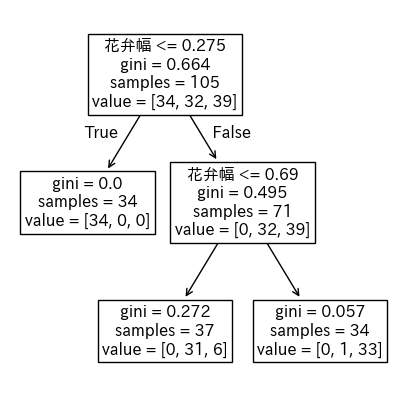

In [12]:
url = 'https://bit.ly/43mPz0L'
iris = pd.read_csv(url)
iris_comp = iris.fillna(iris[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x = iris_comp[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']]
t = iris_comp['種類']
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn import tree
model_tree_iris = tree.DecisionTreeClassifier(max_depth = 2, random_state = random_seed)
model_tree_iris.fit(X = x_train, y = t_train)
plt.figure(figsize = (5, 5))
tree.plot_tree(decision_tree = model_tree_iris, feature_names = list(x.columns))
plt.show()